<a href="https://colab.research.google.com/github/aonvara/python_dataviz2024/blob/main/HW_8_Group_SC_(643020095_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 11/09**

# **HW 8: การบ้านครั้งที่ 8**


---

รายวิชา Basic Programming for Data Science and Data Visualization

นางสาวอรวรา กาญจนวัฒนา 643020095-1 (11/09/2567)

#**โจทย์**: วาด Stacked หรือ Grouped Bar Chart ของข้อมูลหนัง india

##1. นำเข้าข้อมูลและจัดเตรียมข้อมูล

In [ ]:
#นำเข้าข้อมูลที่ใช้
import pandas
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
movie_df = pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv', encoding='latin-1')
print(movie_df.shape)
movie_df.head()

(15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


##2. วิเคราะห์ข้อมูลเพื่อสร้าง Bar Chart: ผู้กำกับที่ได้รับความนิยม/ดังมากที่สุด (โดยอิงจากจำนวนหนังและข้อมูล Rating) สร้างหนังประเภทใดบ้างในแต่ละปี (แกน x) และมีแนวโน้มของ Rating เป็นอย่างไร (แกน y)

###2.1 หาว่าผู้กำกับคนใดได้รับความนิยมที่สุด (ทำหนังจำนวนมาก และมีเปอร์เซ็นไทล์ที่ 75 ของข้อมูล Rating จะต้องมีค่าสูง)

In [ ]:
#เลือกเฉพาะ column ที่ต้องการนำมาวิเคราะห์
#top_director_df
top_director_df = movie_df[['Director', 'Rating']]
top_director_df = top_director_df.dropna()
top_director_df

,Director,Rating
1,Gaurav Bakshi,7.0
3,Ovais Khan,4.4
5,Rahul Rawail,4.7
6,Shoojit Sircar,7.4
8,Allyson Patel,5.6
...,...,...
15501,Bharat Rangachary,5.3
15503,S.P. Muthuraman,5.8
15504,Mahendra Shah,4.6
15505,Kuku Kohli,4.5


In [ ]:
#หาว่าผู้กำกับคนใดทำหนังจำนวนมาก
#จะเห็นว่ามีชื่อผู้กำกับ 3 คน ที่ทำหนังในจำนวน 40 เรื่องขึ้นไปที่มีค่าใกล้กัน
top_director_df['Director'].value_counts()

,count
Director,
Mahesh Bhatt,47
David Dhawan,43
Hrishikesh Mukherjee,42
Shakti Samanta,39
Kanti Shah,38
...,...
Raja Unnithan,1
Pankaj Saraswat,1
S.K. Kapur,1


In [ ]:
#เราจะนำผู้กำกับทั้ง 3 คนมาหาว่า ใครมีเปอร์เซ็นไทล์ที่ 75 ของข้อมูล Rating ที่มีค่าสูง
#พบว่าคุณ Hrishikesh Mukherjee มีค่าสูงที่สุด
list_director = ['Mahesh Bhatt', 'David Dhawan', 'Hrishikesh Mukherjee']

def q75_rating(director):
  R = top_director_df[top_director_df['Director'] == director]['Rating'].quantile(0.75)
  return R

for director in list_director:
  print(f'Q75 Rating of {director} is {q75_rating(director)}')

Q75 Rating of Mahesh Bhatt is 6.2
Q75 Rating of David Dhawan is 6.1
Q75 Rating of Hrishikesh Mukherjee is 7.5


###สรุป: Hrishikesh Mukherjee คือผู้กำกับที่ได้รับความนิยมที่สุด

###2.2 หาว่า Hrishikesh Mukherjee สร้างหนังประเภทใดบ้างตั้งแต่อดีตจนถึงปัจจุบัน

In [ ]:
#เลือกเฉพาะ column ที่ต้องการนำมาวิเคราะห์
#HM_movie_df
HM_movie_df = movie_df[['Year', 'Genre', 'Director', 'Rating']]
HM_movie_df = HM_movie_df.dropna()
HM_movie_df['Year'] = HM_movie_df['Year'].str.replace('(', '').str.replace(')', '').astype(int)

#คัดเฉพาะผู้กำกับ Hrishikesh Mukherjee
HM_movie_df = HM_movie_df[HM_movie_df['Director'] == 'Hrishikesh Mukherjee']
HM_movie_df.shape

(42, 4)

In [ ]:
HM_movie_df.head()

,Year,Genre,Director,Rating
479,1962,Romance,Hrishikesh Mukherjee,6.7
487,1968,Drama,Hrishikesh Mukherjee,7.3
563,1973,"Drama, Musical",Hrishikesh Mukherjee,7.9
589,1983,Drama,Hrishikesh Mukherjee,6.7
806,1977,"Drama, Musical",Hrishikesh Mukherjee,6.7


In [ ]:
#จากตารางจะเห็นว่าหนังเรื่องหนึ่งมีหลาย genre
HM_movie_df['Genre'].value_counts()

,count
Genre,
Drama,8
"Drama, Romance",4
Romance,3
"Comedy, Romance",3
"Drama, Musical",3
"Drama, Family",3
"Comedy, Drama",3
Comedy,3
"Comedy, Drama, Family",2


In [ ]:
#เราจะแก้ปัญโดยการหาประเภทหนังที่มีทั้งหมดก่อน
# prompt: หาประเภทหนังที่มีทั้งหมด โดยในกรณีที่หนังเรื่องหนึ่งมีหลายประเภทให้แยกคำดังกล่าวออกมาเป็นประเภทเดี่ยวๆ
#จะเห็นว่ามีหนังทั้งหมด 9 ประเภทเดี่ยวๆ
#และมีหนังที่ถูกสร้างเยอะอย่างเห็นได้ชัดคือ Drama Comedy Romance
#ดังนั้นเราจะใช้หนังทั้ง 3 ประเภทนี้ในการสร้างกราฟ

import pandas as pd
# สร้าง list ของ genre ทั้งหมด
all_genres = []
for index, row in HM_movie_df.iterrows():
    genres = row['Genre'].split(', ')
    for genre in genres:
        all_genres.append(genre)

# นับจำนวน genre ที่มีทั้งหมด
unique_genres = pd.Series(all_genres).value_counts()
print(unique_genres)


Drama      32
Comedy     16
Romance    13
Musical     7
Family      7
Mystery     2
Action      1
Crime       1
Fantasy     1
Name: count, dtype: int64


In [ ]:
# prompt: สร้าง column ประเภทหนังเพิ่มเติมในตาราง HM_movie_df โดยยึดประเภทจากคำแรกใน column genre

# สร้างฟังก์ชันเพื่อดึงประเภทหนังจากคำแรกใน column genre
def get_main_genre(genre_str):
  genres = genre_str.split(', ')
  return genres[0]

# สร้าง column ใหม่ชื่อ 'main_Genre' โดยใช้ฟังก์ชัน get_main_genre
HM_movie_df['main_Genre'] = HM_movie_df['Genre'].apply(get_main_genre)

HM_movie_df.shape

(42, 5)

In [ ]:
# แสดงผลตาราง HM_movie_df
HM_movie_df.head()

,Year,Genre,Director,Rating,main_Genre
479,1962,Romance,Hrishikesh Mukherjee,6.7,Romance
487,1968,Drama,Hrishikesh Mukherjee,7.3,Drama
563,1973,"Drama, Musical",Hrishikesh Mukherjee,7.9,Drama
589,1983,Drama,Hrishikesh Mukherjee,6.7,Drama
806,1977,"Drama, Musical",Hrishikesh Mukherjee,6.7,Drama


In [ ]:
# prompt: คัดเฉพาะข้อมูล Drama Comedy Romance Musical Family ใน main genre

# คัดเฉพาะข้อมูล Drama Comedy Romance Musical Family ใน main genre
selected_genres = ['Drama', 'Comedy', 'Romance']
HM_movie_df = HM_movie_df[HM_movie_df['main_Genre'].isin(selected_genres)]

HM_movie_df.shape

(40, 5)

In [ ]:
HM_movie_df.head()

,Year,Genre,Director,Rating,main_Genre
479,1962,Romance,Hrishikesh Mukherjee,6.7,Romance
487,1968,Drama,Hrishikesh Mukherjee,7.3,Drama
563,1973,"Drama, Musical",Hrishikesh Mukherjee,7.9,Drama
589,1983,Drama,Hrishikesh Mukherjee,6.7,Drama
806,1977,"Drama, Musical",Hrishikesh Mukherjee,6.7,Drama


##3. สร้างกราฟ

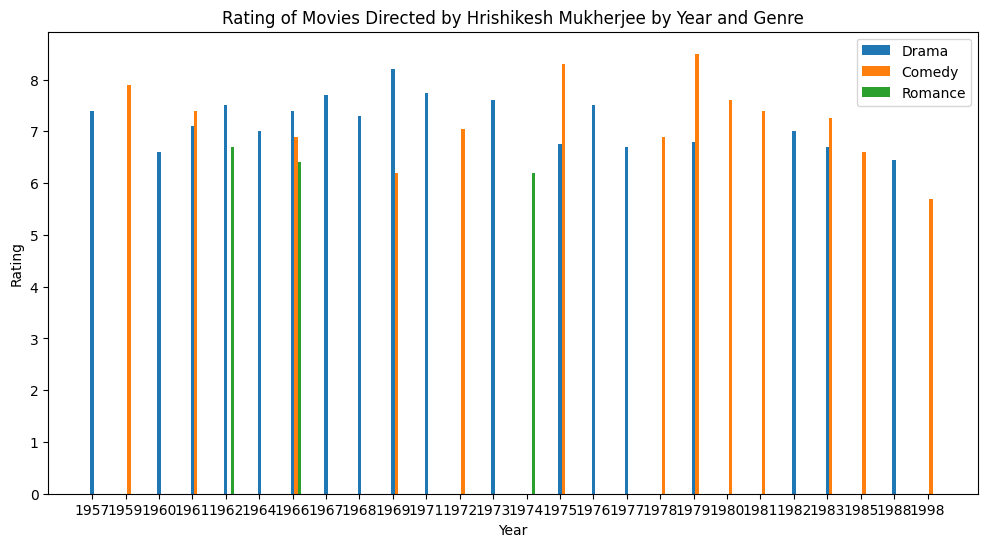

In [ ]:
import matplotlib.pyplot as plt

# Group the data by year and genre, then calculate the mean rating for each group
grouped_data = HM_movie_df2.groupby(['Year', 'main_Genre'])['Rating'].mean().reset_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the grouped bar chart
width = 0.1  # Reduce the width for better visualization
x = range(len(grouped_data['Year'].unique()))  # Use numerical values for x-axis

for i, genre in enumerate(selected_genres):
    # Get the ratings for the current genre
    genre_data = grouped_data[grouped_data['main_Genre'] == genre]

    # Ensure that 'y' has the same length as 'x'
    y = [genre_data[genre_data['Year'] == year]['Rating'].values[0] if year in genre_data['Year'].values else 0 for year in grouped_data['Year'].unique()]

    # Plot the bar chart using numerical x-axis values
    ax.bar([pos + width * i for pos in x], y, width=width, label=genre)

# Set the x-axis labels to 'Year Category' values
ax.set_xticks(x)
ax.set_xticklabels(grouped_data['Year'].unique())

# Set the title and labels
ax.set_title('Rating of Movies Directed by Hrishikesh Mukherjee by Year and Genre')
ax.set_xlabel('Year')
ax.set_ylabel('Rating')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
# Remove parentheses from the 'Year' column
HM_movie_df2 = HM_movie_df.copy() # Create a copy of the DataFrame to avoid modifying the original
HM_movie_df2['Year'] = HM_movie_df2['Year'].astype(str).str.replace(r"\(|\)", "", regex=True) # Convert 'Year' column to string type before using .str.replace()
HM_movie_df2

,Year,Genre,Director,Rating,main_Genre
479,1962,Romance,Hrishikesh Mukherjee,6.7,Romance
487,1968,Drama,Hrishikesh Mukherjee,7.3,Drama
563,1973,"Drama, Musical",Hrishikesh Mukherjee,7.9,Drama
589,1983,Drama,Hrishikesh Mukherjee,6.7,Drama
806,1977,"Drama, Musical",Hrishikesh Mukherjee,6.7,Drama
981,1971,"Drama, Musical",Hrishikesh Mukherjee,8.3,Drama
993,1959,"Comedy, Drama, Musical",Hrishikesh Mukherjee,7.9,Comedy
1174,1966,"Drama, Romance",Hrishikesh Mukherjee,7.4,Drama
1177,1960,"Drama, Romance",Hrishikesh Mukherjee,6.6,Drama
1265,1976,"Drama, Family",Hrishikesh Mukherjee,7.5,Drama


In [ ]:
# prompt: หา min และ max ของ 'Year"

# Find the minimum and maximum values in the 'Year' column
min_year = HM_movie_df2['Year'].min()
max_year = HM_movie_df2['Year'].max()

print(f"Minimum Year: {min_year}")
print(f"Maximum Year: {max_year}")


Minimum Year: 1957
Maximum Year: 1998


In [ ]:
# prompt: จัดกลุ่มข้อมูลปี เป็นสามกลุ่ม 1.1957 - 1970 (14ปี) | 2. 1971 - 1984 (14ปี) | 3. 1985 - 1998 (14ปี) จากข้อมูล HM_movie_df2

# Create a new column 'YearGroup' to categorize the years
def categorize_year(year):
  # Convert year to integer
  year = int(year)
  if 1957 <= year <= 1970:
    return '1957-1970'
  elif 1971 <= year <= 1984:
    return '1971-1984'
  else:
    return '1985-1998'

HM_movie_df2['Year Category'] = HM_movie_df2['Year'].apply(categorize_year)
HM_movie_df2 = HM_movie_df2[['Year Category', 'Rating', 'main_Genre']]
HM_movie_df2.head()


,Year Category,Rating,main_Genre
479,1957-1970,6.7,Romance
487,1957-1970,7.3,Drama
563,1971-1984,7.9,Drama
589,1971-1984,6.7,Drama
806,1971-1984,6.7,Drama


In [ ]:
# prompt: สร้างตารางจาก HM_movie_df2 ที่รวม 'Year Category' ที่เหมือนกันเป็นกลุ่มเดียวกัน

# Group the data by 'Year Category' and aggregate the other columns
grouped_df = HM_movie_df2.groupby('Year Category').agg({
    'Rating': 'mean',  # Calculate the mean rating for each group
    'main_Genre': lambda x: ', '.join(x.unique())  # Combine unique genres into a string
}).reset_index()

# Display the grouped DataFrame
grouped_df


,Year Category,Rating,main_Genre
0,1957-1970,7.180000,"Romance, Drama, Comedy"
1,1971-1984,7.257143,"Drama, Comedy, Romance"
2,1985-1998,6.300000,"Comedy, Drama"


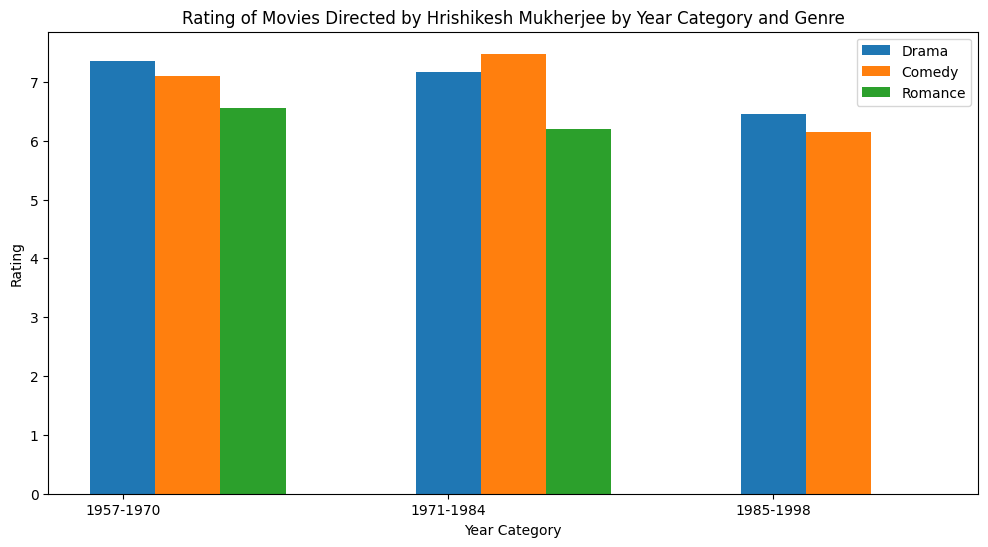

In [ ]:
# prompt: สร้างกราฟ group bar จาก  HM_movie_df2 โดยแกนx คือ 'Year Category', แกนy  คือ 'Rating'

import matplotlib.pyplot as plt
# Group the data by 'Year Category' and 'main_Genre' and calculate the mean rating for each group
grouped_data = HM_movie_df2.groupby(['Year Category', 'main_Genre'])['Rating'].mean().reset_index()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the grouped bar chart
width = 0.2  # Reduce the width for better visualization
x = range(len(grouped_data['Year Category'].unique()))  # Use numerical values for x-axis

for i, genre in enumerate(selected_genres):
    # Get the ratings for the current genre
    genre_data = grouped_data[grouped_data['main_Genre'] == genre]

    # Ensure that 'y' has the same length as 'x'
    y = [genre_data[genre_data['Year Category'] == year]['Rating'].values[0] if year in genre_data['Year Category'].values else 0 for year in grouped_data['Year Category'].unique()]

    # Plot the bar chart using numerical x-axis values
    ax.bar([pos + width * i for pos in x], y, width=width, label=genre)

# Set the x-axis labels to 'Year Category' values
ax.set_xticks(x)
ax.set_xticklabels(grouped_data['Year Category'].unique())

# Set the title and labels
ax.set_title('Rating of Movies Directed by Hrishikesh Mukherjee by Year Category and Genre')
ax.set_xlabel('Year Category')
ax.set_ylabel('Rating')

# Add a legend
ax.legend()

# Show the plot
plt.show()
